# Visualisierung der Bewertung von GiveMe5W1H + BeautifulSoup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 25}

matplotlib.rc('font', **font)

In [5]:
data = pd.read_csv("data/BS_acc.csv", sep=';', header=0)

data.head()

,Who,What,When,Where,Why,How,Category
0,1.0,1.0,1.0,1.0,0.0,0.5,Business
1,1.0,1.0,1.0,1.0,0.0,1.0,Business
2,1.0,0.5,1.0,1.0,1.0,0.5,Business
3,1.0,1.0,0.5,1.0,0.0,0.5,Business
4,1.0,1.0,1.0,1.0,0.0,1.0,Business


#### Visualisierung der fehlenden Antworten mit MissingNo:

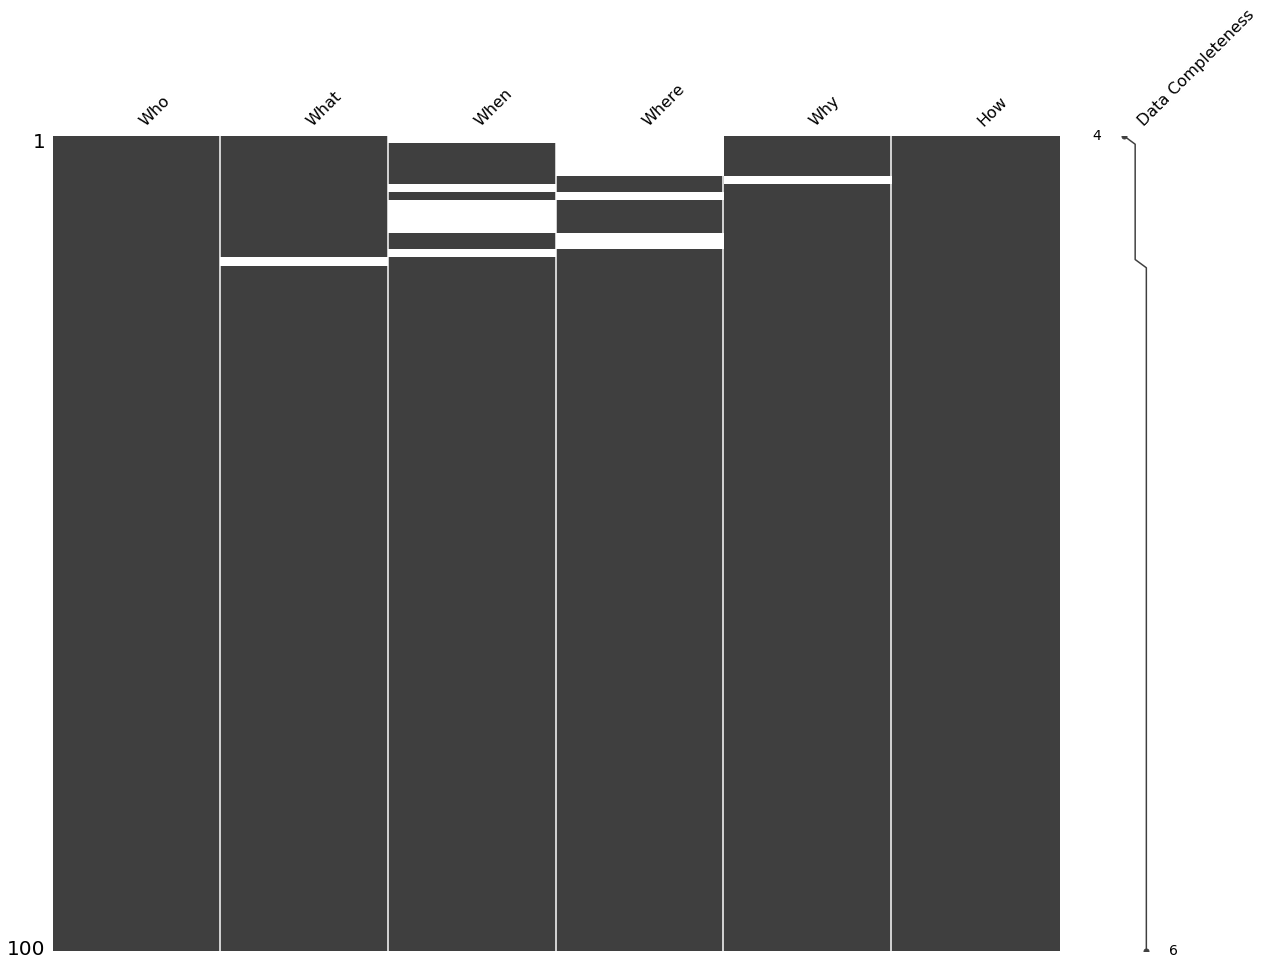

In [6]:
import missingno as msno
sorted_data_1 = msno.nullity_sort(data.drop('Category', axis = 1), sort='ascending')
msno.matrix(sorted_data_1, figsize = (20,15), labels="True")
plt.show()

#### Darstellung der Bewertungen aller Fragen zu den einzelnen Kategorien

In [8]:
categories = ['Business', 'Entertainment', 'Politics', 'Sport', 'Tech'] 
questions = ['Who', 'What', 'When', 'Where', 'Why', 'How']

In [9]:
dict_cat = {}
dict_cat_withNaN = {}

for category in categories:
    
    temp = data[data['Category'] == category].drop('Category', axis = 1)
    accuracies = []
    accuracies_withNaN = []
    
    for q in questions:
        accuracies.append(temp[q].dropna().mean())
        accuracies_withNaN.append(temp[q].fillna(0).mean())
        
    dict_cat[category] = accuracies 
    dict_cat_withNaN[category] = accuracies_withNaN

In [10]:
df = pd.DataFrame(dict_cat, index = questions)
df_withNaN = pd.DataFrame(dict_cat_withNaN, index = questions)

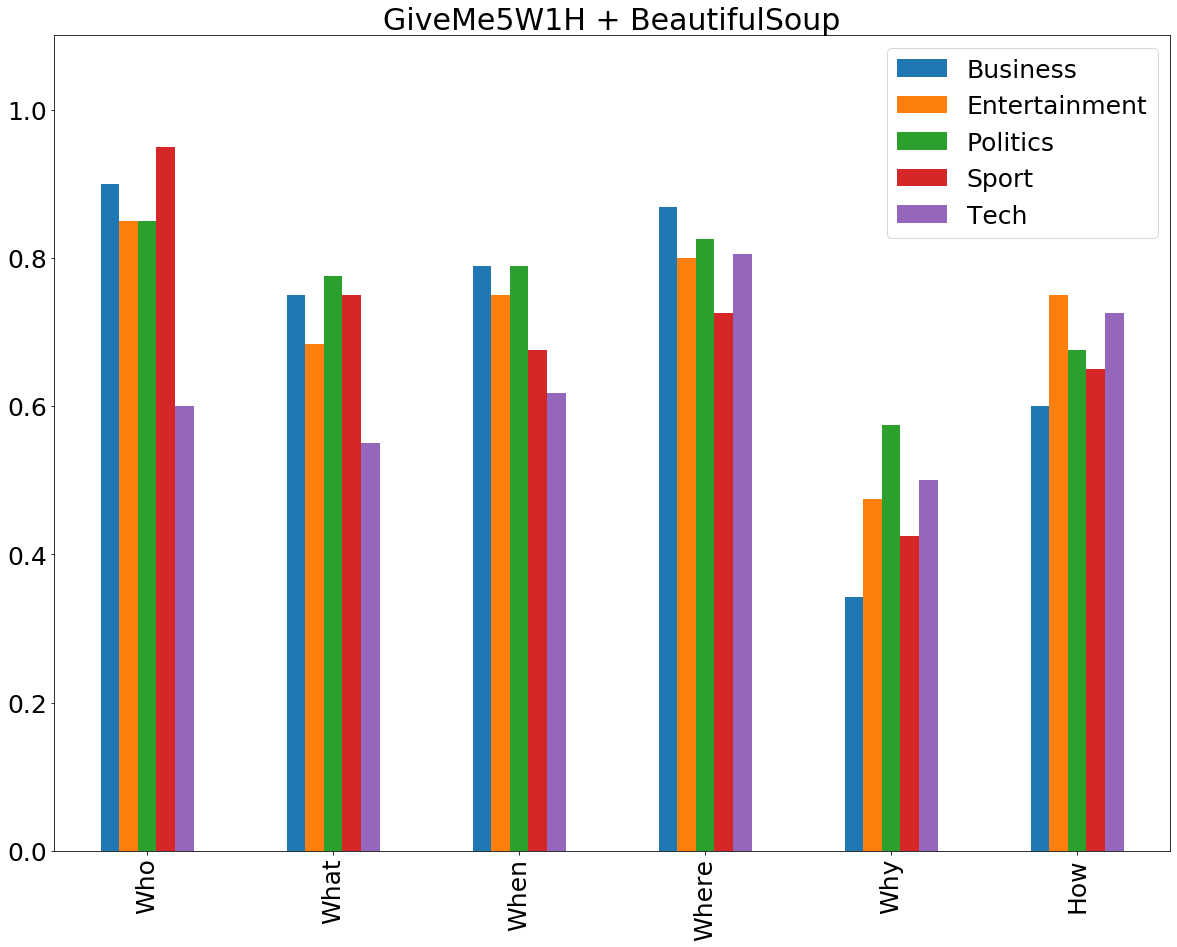

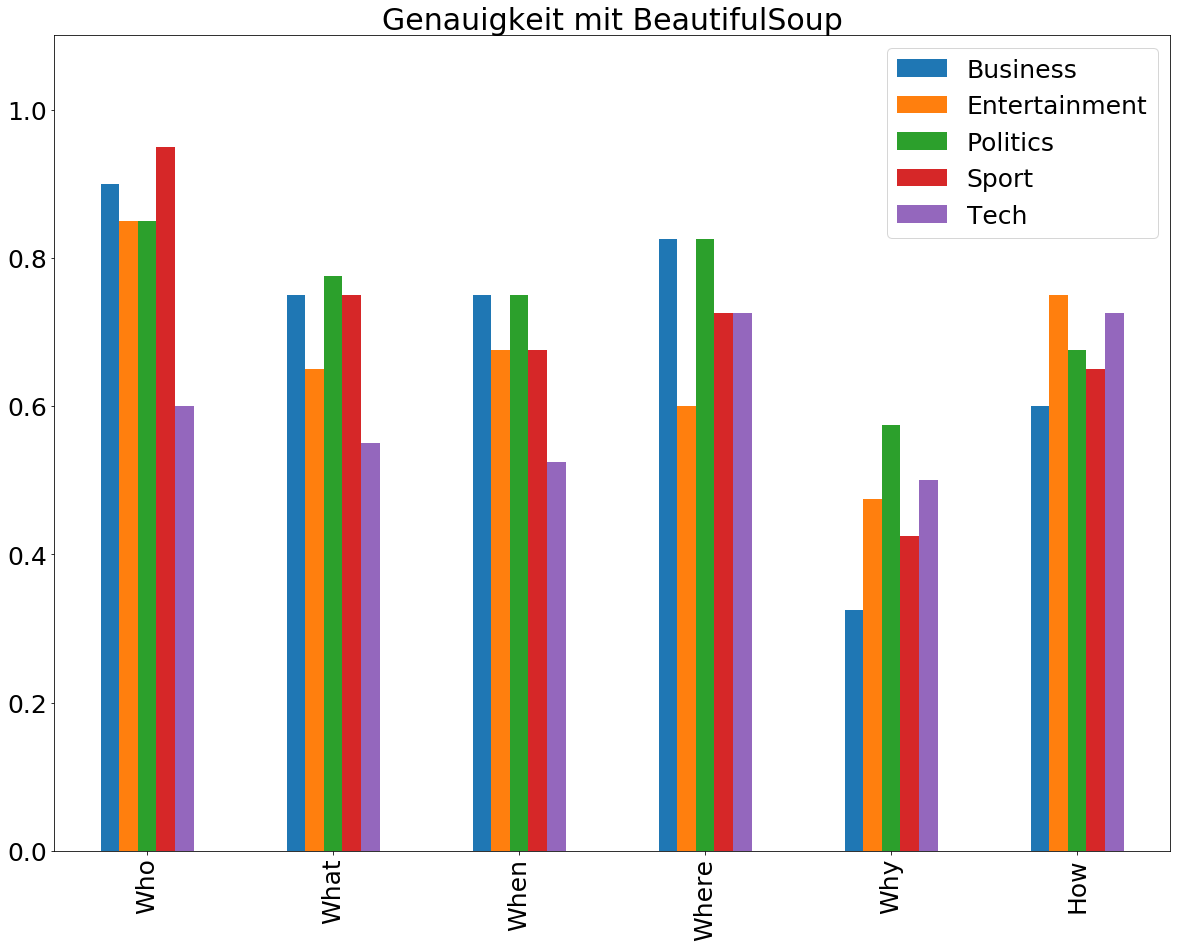

In [11]:
df.plot(figsize=(20, 15), kind = "bar", ylim = (0,1.1), title="GiveMe5W1H + BeautifulSoup")
df_withNaN.plot(figsize=(20, 15), kind = "bar", ylim = (0,1.1),  title="Genauigkeit mit BeautifulSoup")

plt.show()

#### Kummulierte Bewertungen:

In [12]:
df_acc_cat = df
df_acc_cat = df_acc_cat.drop(['Why','How'])

cat_4 = df_acc_cat.mean().to_numpy()
cat_6 = df.mean().to_numpy()

cat_4 = np.append(cat_4, cat_4.mean())
cat_6 = np.append(cat_6, cat_6.mean())

dict_combined = {}
    
dict_combined['4W'] = cat_4
dict_combined['5W1H'] = cat_6

indices = ['Business', 'Entertainment', 'Politics', 'Sport', 'Tech', 'All']
df_combined = pd.DataFrame(dict_combined, index = indices)

df_combined.T

,Business,Entertainment,Politics,Sport,Tech,All
4W,0.826974,0.771053,0.809868,0.775000,0.643301,0.765239
5W1H,0.708333,0.718202,0.748246,0.695833,0.633034,0.700730


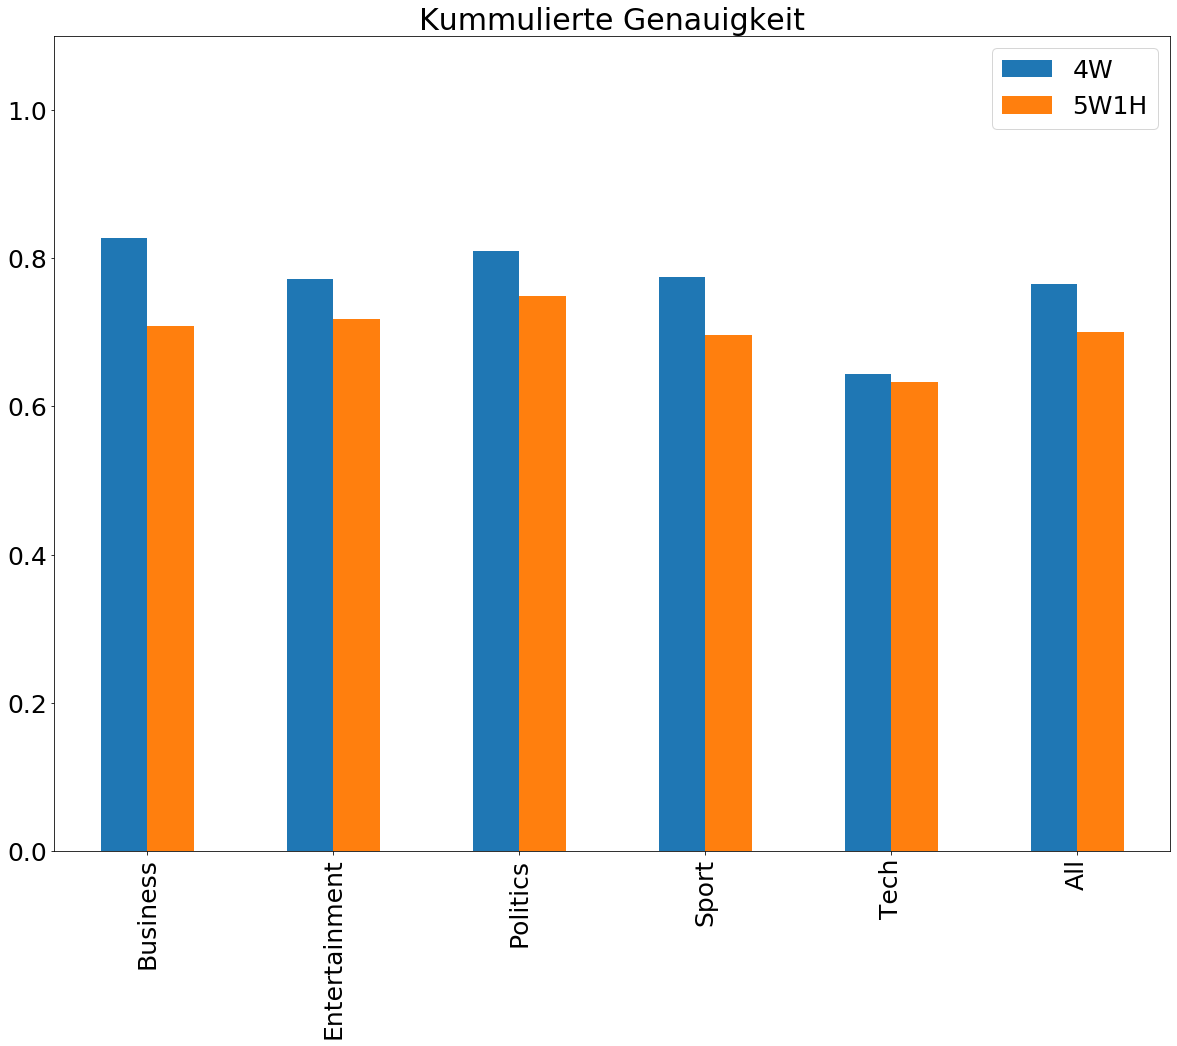

In [13]:
df_combined.plot(figsize=(20, 15), kind = "bar", ylim = (0,1.1), title="Kummulierte Genauigkeit")
plt.show()